# Temperature forecasting Using Linear Regression

##### The dataset includes daily weather summary an area called Szeged, Hungary with 12 columns and around 100k rows. The dataset is taken from below url:
https://www.kaggle.com/budincsevity/szeged-weather

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
weather_data = pd.read_csv('weatherHistory.csv')

##### Descriptive analysis

In [3]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
#Removing missing values
weather_data.dropna(inplace = True)

In [7]:
#Checking if categorical
weather_data['Daily Summary'].nunique()

214

In [8]:
weather_data['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              95936 non-null object
Summary                     95936 non-null object
Precip Type                 95936 non-null object
Temperature (C)             95936 non-null float64
Apparent Temperature (C)    95936 non-null float64
Humidity                    95936 non-null float64
Wind Speed (km/h)           95936 non-null float64
Wind Bearing (degrees)      95936 non-null float64
Visibility (km)             95936 non-null float64
Loud Cover                  95936 non-null float64
Pressure (millibars)        95936 non-null float64
Daily Summary               95936 non-null object
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [10]:
weather_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [11]:
#Decribe Categorical data
weather_data.describe(include=['O'])

,Formatted Date,Summary,Precip Type,Daily Summary
count,95936,95936,95936,95936
unique,95912,27,2,214
top,2010-08-02 02:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31635,85224,20020


In [12]:
# Label Encoding
import sklearn.model_selection
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
weather_data['Precip Type'] = label_encoder.fit_transform(weather_data['Precip Type'])
weather_data['Daily Summary'] = label_encoder.fit_transform(weather_data['Daily Summary'])
weather_data['Summary'] = label_encoder.fit_transform(weather_data['Summary'])

In [13]:
#Coorelation between all the members of the dataset
weather_data.corr()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Summary,1.000000,-0.116821,0.145821,0.141956,-0.112823,0.003068,0.023057,0.135659,NaN,0.144449,0.156701
Precip Type,-0.116821,1.000000,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,NaN,0.009271,-0.251911
Temperature (C),0.145821,-0.563503,1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,NaN,-0.005253,0.439386
Apparent Temperature (C),0.141956,-0.566058,0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,NaN,-0.000037,0.434318
Humidity,-0.112823,0.232622,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,NaN,0.005375,-0.368970
Wind Speed (km/h),0.003068,-0.067771,0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,NaN,-0.049453,-0.003597
Wind Bearing (degrees),0.023057,-0.042142,0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,NaN,-0.011629,0.053835
Visibility (km),0.135659,-0.316483,0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,NaN,0.061011,0.459446
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),0.144449,0.009271,-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,NaN,1.000000,0.054901


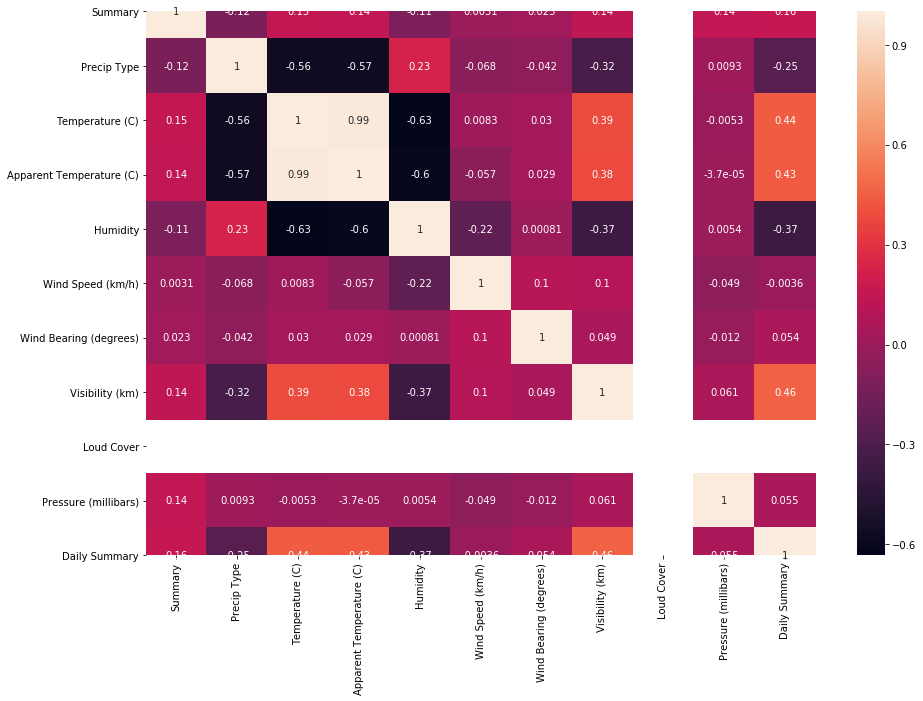

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(weather_data.corr(), annot=True)

Let's take only related fields and check there relations graphically.

In [15]:
weather_data_var = weather_data.iloc[:,[0,1,2,3,4,5,8,11]]
weather_data_var.corr()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Daily Summary
Summary,1.000000,-0.116821,0.145821,0.141956,-0.112823,0.135659,0.156701
Precip Type,-0.116821,1.000000,-0.563503,-0.566058,0.232622,-0.316483,-0.251911
Temperature (C),0.145821,-0.563503,1.000000,0.992637,-0.632148,0.393719,0.439386
Apparent Temperature (C),0.141956,-0.566058,0.992637,1.000000,-0.602390,0.382589,0.434318
Humidity,-0.112823,0.232622,-0.632148,-0.602390,1.000000,-0.370511,-0.368970
Visibility (km),0.135659,-0.316483,0.393719,0.382589,-0.370511,1.000000,0.459446
Daily Summary,0.156701,-0.251911,0.439386,0.434318,-0.368970,0.459446,1.000000


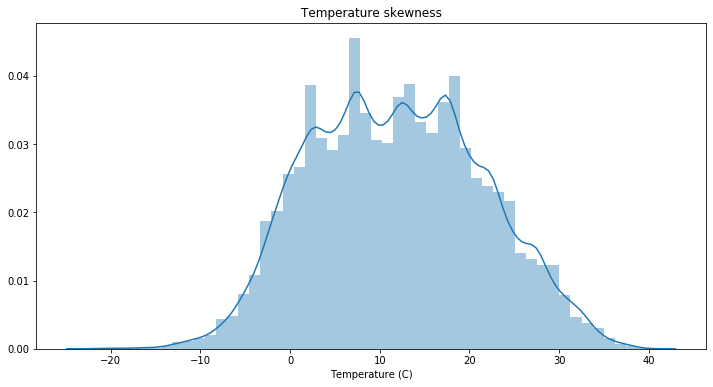

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(weather_data_var['Temperature (C)'])
plt.title('Temperature skewness')
plt.show()

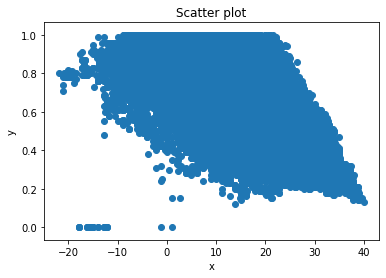

In [17]:
plt.scatter(x='Temperature (C)', y='Humidity', data= weather_data_var)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

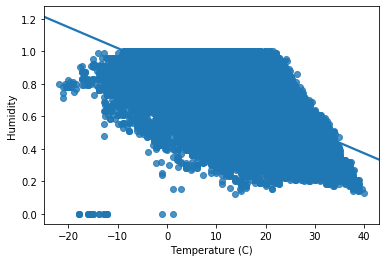

In [18]:
sns.regplot(x=weather_data_var["Temperature (C)"], y=weather_data_var["Humidity"])

We can see negative correlation between them but there are few outliers which are needed to be removed to get better results.

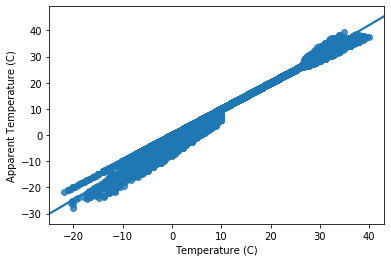

In [19]:
sns.regplot(x=weather_data_var["Temperature (C)"], y=weather_data_var["Apparent Temperature (C)"])

We can see linear relationship between them.

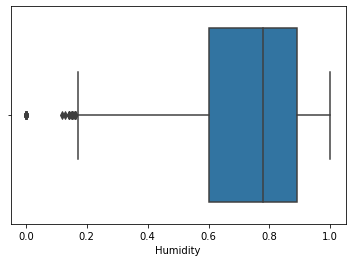

In [20]:
sns.boxplot(x=weather_data_var['Humidity'])

Let's remove all the outliers with z-score above the threshold of 3.

In [21]:
outliers=[]
def detect_outlier(weather_data_var):
    
    threshold=3
    mean_1 = np.mean(weather_data_var)
    std_1 =np.std(weather_data_var)
    
    
    for y in weather_data_var:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [22]:
outlier_data = detect_outlier(weather_data_var["Humidity"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [23]:
weather_data_var_clean = weather_data_var[weather_data_var["Humidity"]>0.15]

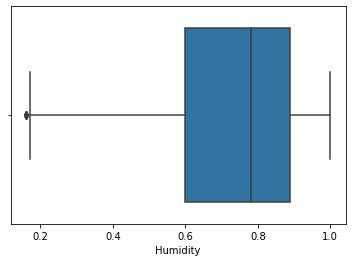

In [24]:
sns.boxplot(x=weather_data_var_clean['Humidity'])

Checking if the removal of outliers have affetcted the pattern

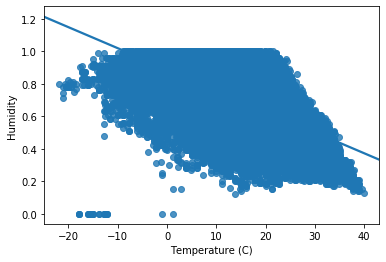

In [25]:
sns.regplot(x=weather_data["Temperature (C)"], y=weather_data["Humidity"])


We can see some strong relationship between Temperature and Apparent temperature.

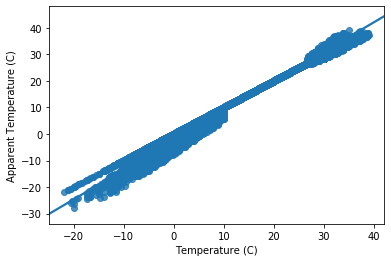

In [26]:
sns.regplot(x=weather_data_var_clean["Temperature (C)"], y=weather_data_var_clean["Apparent Temperature (C)"])

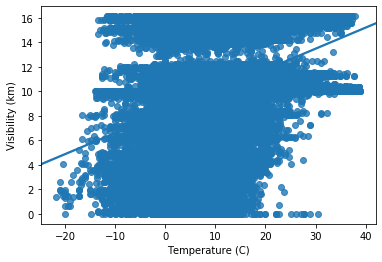

In [27]:
sns.regplot(x=weather_data_var_clean["Temperature (C)"], y=weather_data_var_clean["Visibility (km)"])

We don't see satisfactory relation between these two variables, so let's drop this column as well for the better result of the model.

*Time Series* for Temperature

In [28]:
weather_data_var_clean.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,0,9.472222,7.388889,0.89,15.8263,197
1,2006-04-01 01:00:00.000 +0200,19,0,9.355556,7.227778,0.86,15.8263,197
2,2006-04-01 02:00:00.000 +0200,17,0,9.377778,9.377778,0.89,14.9569,197
3,2006-04-01 03:00:00.000 +0200,19,0,8.288889,5.944444,0.83,15.8263,197
4,2006-04-01 04:00:00.000 +0200,17,0,8.755556,6.977778,0.83,15.8263,197


In [29]:
#Creating dependent and independent variables
y = weather_data_var_clean.iloc[:,[3]]
x = weather_data_var_clean.iloc[:,[1,2,4,5,7]]

In [30]:
#Splitting dataset into training and testing set
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(76718, 5)
(19180, 5)
(76718, 1)
(19180, 1)


In [32]:
#Fitting multiple linear model to training dataset
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's find the coefficient of our independent variables

In [33]:
regressor.coef_

array([[ 6.32240673e-03, -3.30355054e-01,  8.49596772e-01,
        -2.72816219e+00,  3.78872026e-04]])

Let's find the intercept

In [34]:
regressor.intercept_

array([4.60376277])

In [35]:
# Predict the test results
y_pred = regressor.predict(x_test)

In [36]:
#The coefficient of determination
regressor.score(x,y)

0.9872905988171984

In [37]:
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0798239332405455


In [38]:
import statsmodels.api as sm
model = sm.OLS(y_pred,x_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.477e+06
Date:                Mon, 18 May 2020   Prob (F-statistic):                        0.00
Time:                        18:16:34   Log-Likelihood:                         -17381.
No. Observations:               19180   AIC:                                  3.477e+04
Df Residuals:                   19175   BIC:                                  3.481e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Summary                      0.0719      0.001     80.548      0.000       0.070       0.074
Precip Type                  0.3791      0.016     23.713      0.000       0.348       0.410
Apparent Temperature (C)     0.8911      0.001   1635.304      0.000       0.890       0.892
Humidity                     0.5266      0.016     32.137      0.000       0.494       0.559
Daily Summary                0.0046   8.12e-05     57.228      0.000       0.004       0.005
==============================================================================
Omnibus:                      661.195   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.015
Skew:                           0.406   Prob(JB):                    1.28e-176
Kurtosis:                       3.595   Cond. No.                         574.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""